# Modelos pre-entrenados

Aunque a menudo es necesario disponer de un conjunto de datos grande y bien anotado para resolver un reto de aprendizaje profundo, hay muchos modelos preentrenados disponibles gratuitamente que podemos utilizar nada más sacarlos de la caja. Cuando se decide emprender un proyecto de aprendizaje profundo, es una gran idea empezar buscando modelos existentes en línea que puedan ayudar a lograr el objetivo. Un buen lugar para explorar los modelos disponibles es [NGC](https://ngc.nvidia.com/catalog/models). También hay muchos modelos alojados en GitHub que pueden encontrarse buscando en Google. 

## Objetivos

* Utilizar Keras para cargar un modelo preentrenado muy bien entrenado.
* Preprocesar nuestras propias imágenes para trabajar con el modelo preentrenado.
* Utilizar el modelo preentrenado para realizar inferencias precisas en nuestras propias imágenes.

## Una puerta automática para perros

En esta sección, crearemos una puerta para perros que sólo permita entrar y salir a los perros (y no a otros animales). Podemos mantener a nuestros gatos dentro, y a otros animales fuera, donde les corresponde. Utilizando las técnicas que hemos visto hasta ahora, necesitaríamos un conjunto de datos muy grande con fotos de muchos perros y otros animales. Por suerte, hay un modelo disponible que ha sido entrenado en un conjunto de datos masivo, que incluye muchos animales. 

El [ImageNet challenge](https://en.wikipedia.org/wiki/ImageNet#History_of_the_ImageNet_challenge) ha producido muchos modelos de última generación que pueden utilizarse para la clasificación de imágenes. Se han entrenado con millones de imágenes y pueden clasificarlas con precisión en 1.000 categorías diferentes. Muchas de esas categorías son animales, incluidas razas de perros y gatos. Es un modelo perfecto para nuestra puerta para perros.

## Cargando el Modelo

Empezaremos descargando el modelo. Los modelos entrenados de ImageNet están disponibles para descargar directamente dentro de la librería Keras. Puedes ver los modelos disponibles y sus detalles [aquí](https://keras.io/api/applications/#available-models). Cualquiera de estos modelos serviría para nuestro ejercicio. Nosotros escogeremos uno de uso común llamado [VGG16](https://keras.io/api/applications/vgg/):

In [ ]:
from tensorflow.keras.applications import VGG16
  
# Cargar la red VGG16 pre-entrenada en el conjunto de datos ImageNet
model = VGG16(weights="imagenet")

2025-03-13 16:09:18.183017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741882158.311601    4459 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741882158.346395    4459 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 16:09:18.656759: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 16:09:26.660151: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


2025-03-13 16:10:20.701619: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


Ahora que ya está cargado, echemos un vistazo al modelo. Se parece mucho a nuestro modelo convolucional del ejercicio de lenguaje de signos. Presta atención a la primera capa (la capa de entrada) y a la última capa (la capa de salida). Como en los ejercicios anteriores, debemos asegurarnos de que nuestras imágenes coinciden con las dimensiones de entrada que espera el modelo. También es importante comprender lo que el modelo devolverá de la última capa de salida.

In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

### Dimensiones de entrada
Podemos ver que el modelo está esperando imágenes de la forma de (224, 224, 3) que corresponden a 224 píxeles de alto, 224 píxeles de ancho y 3 canales de color. Como aprendimos en nuestro último ejercicio, los modelos Keras pueden aceptar más de una imagen a la vez para la predicción. Si pasamos una sola imagen, la forma será (1, 224, 224, 3). Tendremos que asegurarnos de que cuando pasemos imágenes a nuestro modelo para la predicción, coincidan con estas dimensiones. 

### Dimensiones de salida
También podemos ver que el modelo devolverá una predicción de la forma 1000. Recuerda que en nuestro primer ejercicio la forma de salida de nuestro modelo era 10, correspondiente a los 10 dígitos diferentes. En nuestro segundo ejercicio teníamos una forma de 24, correspondiente a las 24 letras del alfabeto del lenguaje de signos que se pueden capturar en una imagen fija. En este caso, tenemos 1000 categorías posibles en las que se colocará la imagen. Aunque el conjunto de datos ImageNet completo tiene más de 20.000 categorías, el concurso y los modelos preentrenados resultantes sólo utilizan un subconjunto de 1.000 de estas categorías. Podemos echar un vistazo a todas estas [categorías posibles aquí](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

Muchas de las categorías son animales, incluidos muchos tipos de perros y gatos. Los perros son las categorías 151 a 268. Los gatos son las categorías 281 a 285. Podremos utilizar estas categorías para decirle a nuestra puerta para perros qué tipo de animal está en nuestra puerta, y si debemos dejarle entrar o no.

## Cargando una imagen
Empezaremos cargando una imagen y mostrándola.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(1200, 1800, 3)


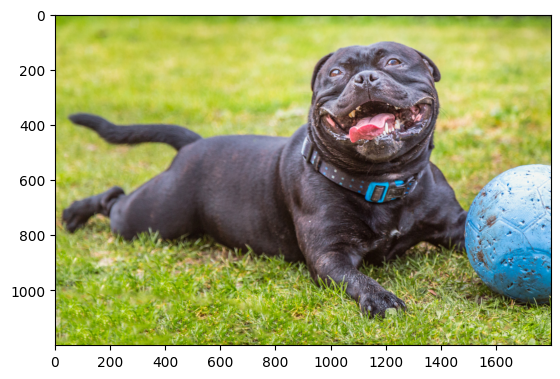

In [11]:

show_image("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/happy_dog.jpg")


## Preprocesado de la imagen


A continuación, tenemos que preprocesar la imagen para que esté lista para ser enviada al modelo. Esto es igual que lo que se hizo en la predicción sobre las imágenes del lenguaje de signos.En este caso, la forma final de la imagen tiene que ser (1, 224, 224, 3).

Cuando cargamos modelos directamente con Keras, también podemos aprovechar los métodos [`preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input). Estos métodos, asociados con un modelo específico, permiten a los usuarios preprocesar sus propias imágenes para que coincidan con las cualidades de las imágenes con las que el modelo fue entrenado originalmente. Nosotros mismos tuvimos que hacerlo manualmente al realizar la inferencia con nuevas imágenes ASL:

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Imprimir la forma original de la imagen, para referencia
    print('Formato imagen original: ', mpimg.imread(image_path).shape)
    
    # Cargar la imagen con un tamaño objetivo de 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convertir la imagen de un formato PIL a una matriz numpy

    image = image_utils.img_to_array(image)

    # Añadir una dimensión para el número de imágenes, en nuestro caso 1
    image = image.reshape(1,224,224,3)
   
    # Preprocesar la imagen para alinearse con el conjunto de datos original de ImageNet
    image = preprocess_input(image)

    # Imprimir la forma de la imagen después del procesamiento
    print('Formato imagen procesada: ', image.shape)
    return image

In [17]:
processed_image = load_and_process_image("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


## Realizar una predicción

Ahora que tenemos nuestra imagen en el formato correcto, podemos pasarla a nuestro modelo y obtener una predicción. Estamos esperando una salida de un array de 1000 elementos, que va a ser difícil de leer. Afortunadamente, los modelos cargados directamente con Keras tienen otro método útil que traducirá ese array de predicción a una forma más legible. 

Rellena la siguiente función para implementar la predicción:

In [ ]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Mostrar la imagen
    FIXME
    # Cargar y preprocesar la imagen
    image = FIXME
    # Realizar la predicción
    predictions = FIXME
    # Mostrar las predicciones en un formato legible
    print('Predicción:', decode_predictions(predictions, top=3))

### Solución

Click sobre los '...' de la celda siguiente para ver la solución.

In [ ]:
# SOLUCION
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Mostrar imagen
    show_image(image_path)
    # Cargar y preprocesar la imagen
    image = load_and_process_image(image_path)
    # Realizar predicciones
    predictions = model.predict(image)
    # Mostrar predicciones en una forma legible
    print('Predicción:', decode_predictions(predictions, top=3))

Pruébalo con algunos animales para ver los resultados. También puedes subir tus propias imágenes y categorizarlas para ver qué tal funciona.

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted: [[('n02093256', 'Staffordshire_bullterrier', np.float32(0.4509502)), ('n02110958', 'pug', np.float32(0.32263014)), ('n02099712', 'Labrador_retriever', np.float32(0.09343313))]]


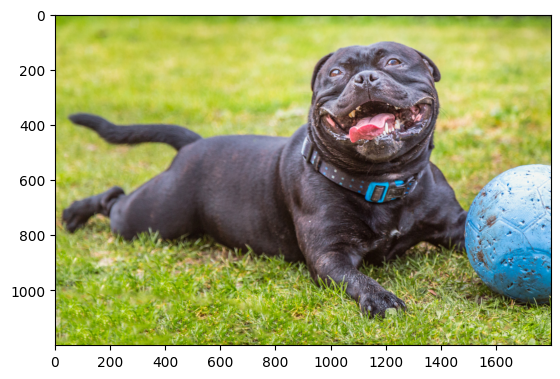

In [19]:
readable_prediction("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/happy_dog.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted: [[('n02132136', 'brown_bear', np.float32(0.9853864)), ('n02133161', 'American_black_bear', np.float32(0.013876297)), ('n02410509', 'bison', np.float32(0.00026586154))]]


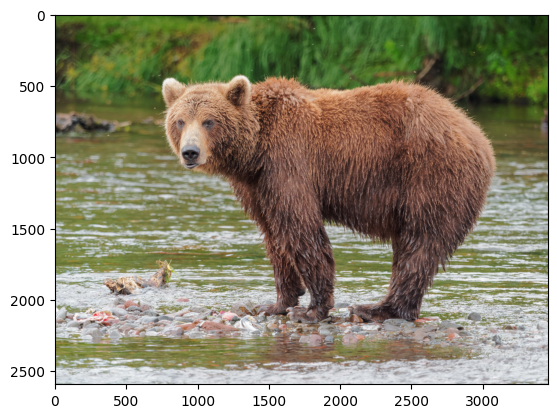

In [20]:
readable_prediction("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Predicted: [[('n02123159', 'tiger_cat', np.float32(0.7366056)), ('n02124075', 'Egyptian_cat', np.float32(0.17488627)), ('n02123045', 'tabby', np.float32(0.045883782))]]


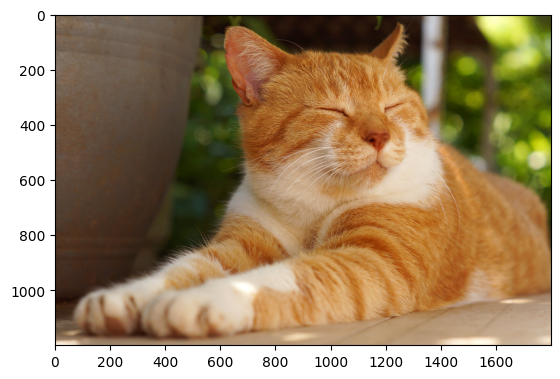

In [21]:
readable_prediction("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/sleepy_cat.jpg")

## Sólo perros

Ahora que estamos haciendo predicciones con nuestro modelo, podemos utilizar nuestras categorías para dejar entrar y salir sólo a los perros y mantener a los gatos dentro. Recuerda que los perros son las categorías 151 a 268 y los gatos son las categorías 281 a 285. La función [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) puede encontrar qué elemento de la matriz de predicción es la categoría superior.

In [ ]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if FIXME:
        print("Pasa perrito!")
    elif FIXME:
        print("Minino quédate dentro!")
    else:
        print("No eres un perro! Quédate fuera!")

### Solución

Click sobre los '...' de la celda siguiente para ver la solución.

In [22]:
# SOLUCION
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Pasa perrito!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Minino quédate dentro!")
    else:
        print("No eres un perro! Quédate fuera!")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
No eres un perro! Quédate fuera!


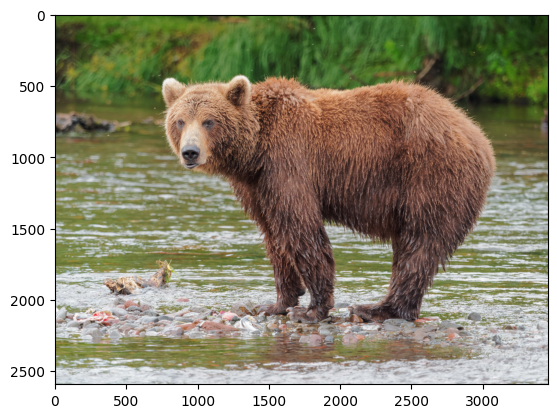

In [23]:
doggy_door("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Pasa perrito!


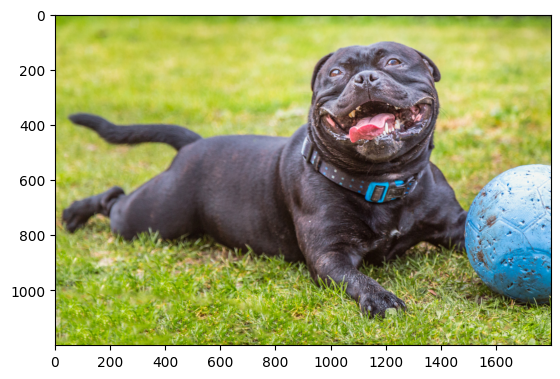

In [24]:
doggy_door("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/happy_dog.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Minino quédate dentro!


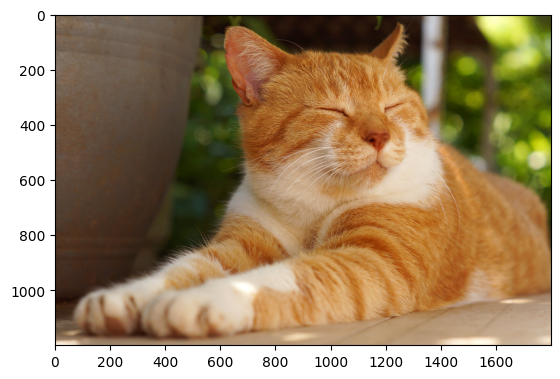

In [25]:
doggy_door("/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/SISTEMAS DE APRENDIZAJE AUTOMATICO/NOTEBOOKS DEL AULA/Redes Neuronales/datasets/doggy_door_images/sleepy_cat.jpg")

## Conclusión

Utilizando un modelo preentrenado, hemos creado una puerta para perros funcional en tan solo unas líneas de código. Hemos visto que es posible aprovechar las ventajas del aprendizaje profundo sin mucho trabajo previo. Lo mejor es que, a medida que la comunidad de aprendizaje profundo avance, habrá más modelos disponibles para que se puedan usar en nuestros propios proyectos.